In [ ]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ƒê·ªçc d·ªØ li·ªáu

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Insurance.csv')
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# 2. Ki·ªÉm tra c√°c th√¥ng tin c∆° b·∫£n.

In [ ]:
#xem th√¥ng tin chung v·ªÅ d·ªØ li·ªáu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# - ki·ªÉm tra ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu: thi·∫øu, tr√πng l·∫Øp

In [ ]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Ki·ªÉm tra gi√° tr·ªã thi·∫øu v√† tr√πng l·∫∑p
missing_values = data.isnull().sum()
duplicated_rows = data.duplicated().sum()


In [ ]:
# Ki·ªÉm tra gi√° tr·ªã thi·∫øu
if missing_values.sum() == 0:
    print("Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu trong d·ªØ li·ªáu.")
else:
    print("C√°c c·ªôt c√≥ gi√° tr·ªã thi·∫øu:")
    print(missing_values[missing_values > 0])

Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu trong d·ªØ li·ªáu.


In [ ]:
# Ki·ªÉm tra gi√° tr·ªã tr√πng l·∫∑p
if data.duplicated().sum() == 0:
    print("Kh√¥ng c√≥ d√≤ng d·ªØ li·ªáu tr√πng l·∫∑p.")
else:
    print(f"C√≥ {duplicated_rows} d√≤ng tr√πng l·∫∑p trong d·ªØ li·ªáu.")

C√≥ 1 d√≤ng tr√πng l·∫∑p trong d·ªØ li·ªáu.


In [ ]:
data[data.duplicated()]

age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

In [ ]:
data.drop_duplicates(inplace = True)
data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

# - th·ªëng k√™ m√¥ t·∫£:

In [ ]:

description = data.describe(include='all')
description

age   sex          bmi     children smoker     region  \
count   1337.000000  1337  1337.000000  1337.000000   1337       1337   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   675          NaN          NaN   1063        364   
mean      39.222139   NaN    30.663452     1.095737    NaN        NaN   
std       14.044333   NaN     6.100468     1.205571    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.290000     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.700000     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1337.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13279.121487  
std     12110.359656  
min      1121.873900  
25%      4746.344000  
50%      9386.161300  
75%     16657.717450  
max     63770.428010

In [ ]:
#Ph√¢n lo·∫°i c√°c c·ªôt
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Th·ªëng k√™ cho categorical features
print("Categorical Features:")
print("=================================")
for feature in categorical_features:
    print(f"{feature}:\n{data[feature].value_counts()}\n")

Categorical Features:
sex:
sex
male      675
female    662
Name: count, dtype: int64

smoker:
smoker
no     1063
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64



In [ ]:
# Th·ªëng k√™ cho numerical features
print("Numerical Features:")
# Th·ªëng k√™ m√¥ t·∫£ chung cho d·ªØ li·ªáu s·ªë
print(data[numerical_features].describe())

Numerical Features:
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


# 3. EDA

# - xem x√©t ph√¢n ph·ªëi Target

Text(0.5, 1.0, 'Distribution of Charges')

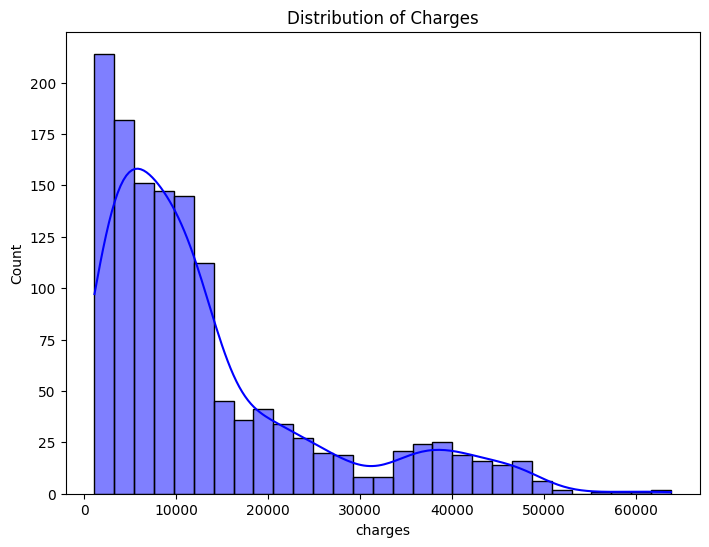

In [ ]:
# Thi·∫øt l·∫≠p k√≠ch th∆∞·ªõc h√¨nh ·∫£nh
plt.figure(figsize=(18, 6))

# Ph√¢n ph·ªëi c·ªßa bi·∫øn m·ª•c ti√™u (charges)
plt.subplot(1, 2, 1)
sns.histplot(data['charges'], kde=True, color='blue')
plt.title('Distribution of Charges')

- Ph√¢n ph·ªëi l·ªách ph·∫£i, v·ªõi m·ªôt s·ªë gi√° tr·ªã cao b·∫•t th∆∞·ªùng.
- Ph·∫ßn l·ªõn c√°c chi ph√≠ b·∫£o hi·ªÉm t·∫≠p trung trong kho·∫£ng d∆∞·ªõi 20,000.

# - xem x√©t m·ªëi quan h·ªá gi·ªØa c√°c features -> target

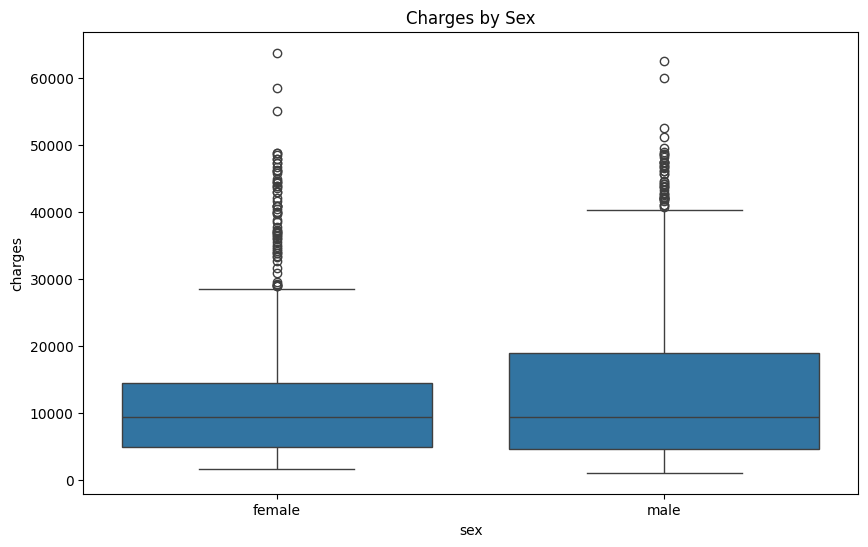

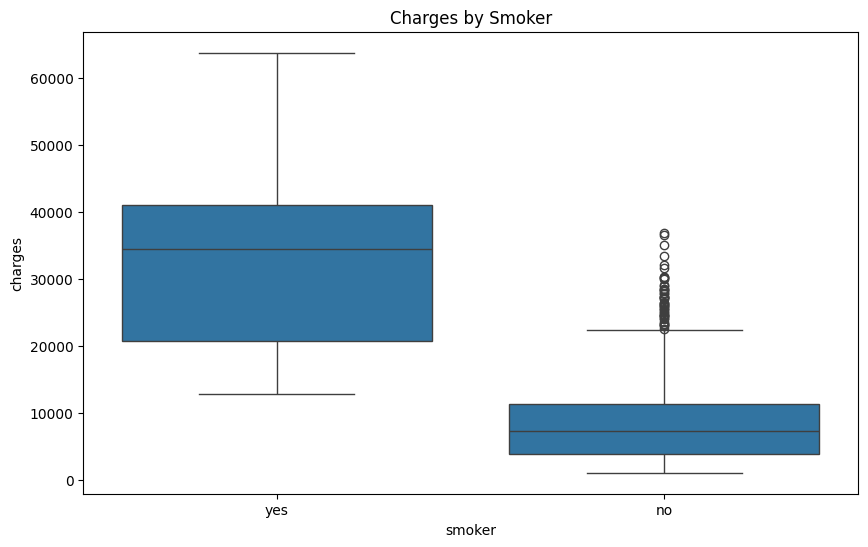

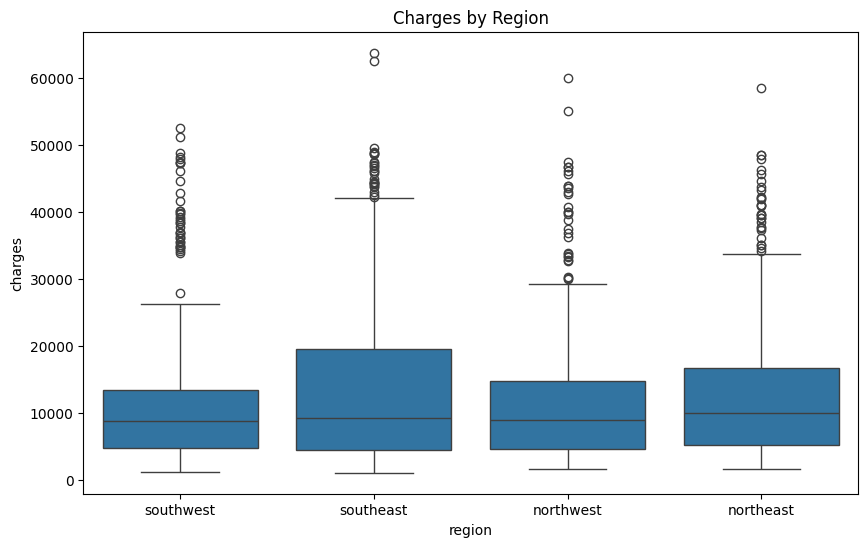

In [ ]:
# 1. M·ªëi quan h·ªá gi·ªØa categorical features -> target
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature], y=data['charges'])
    plt.title(f'Charges by {feature.capitalize()}')
    plt.show()


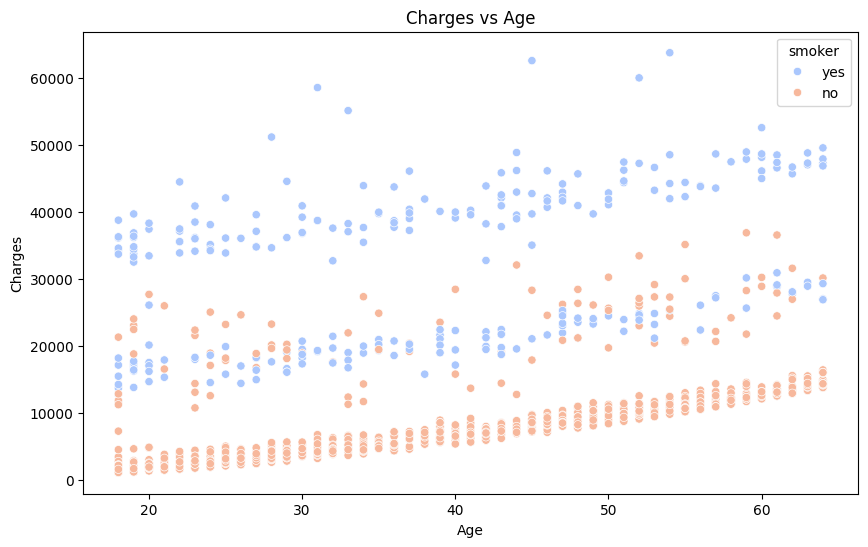

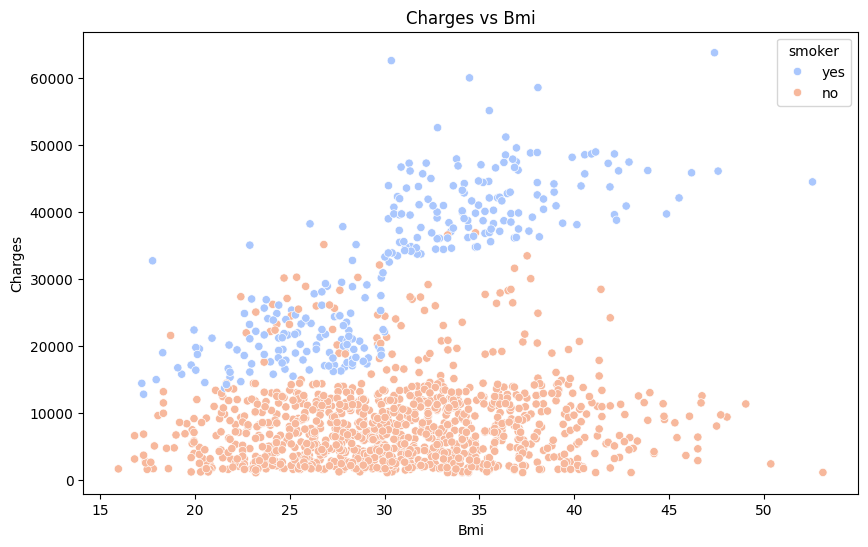

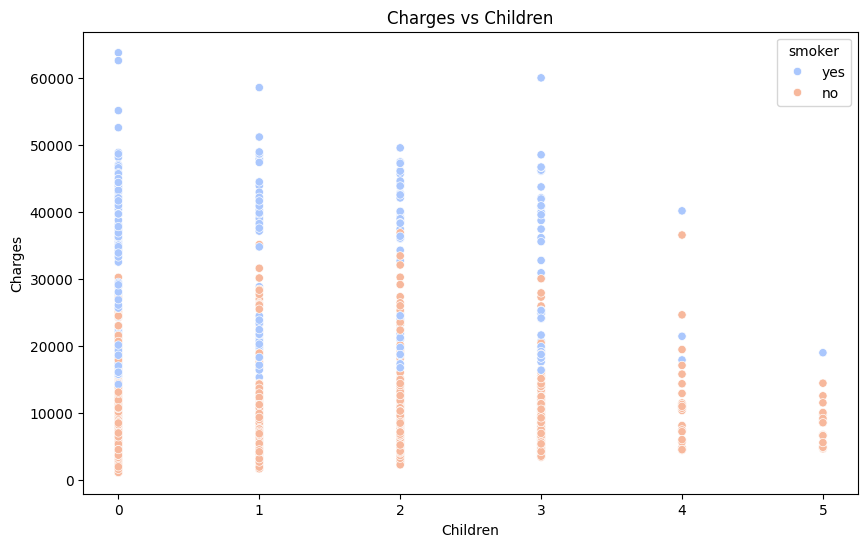

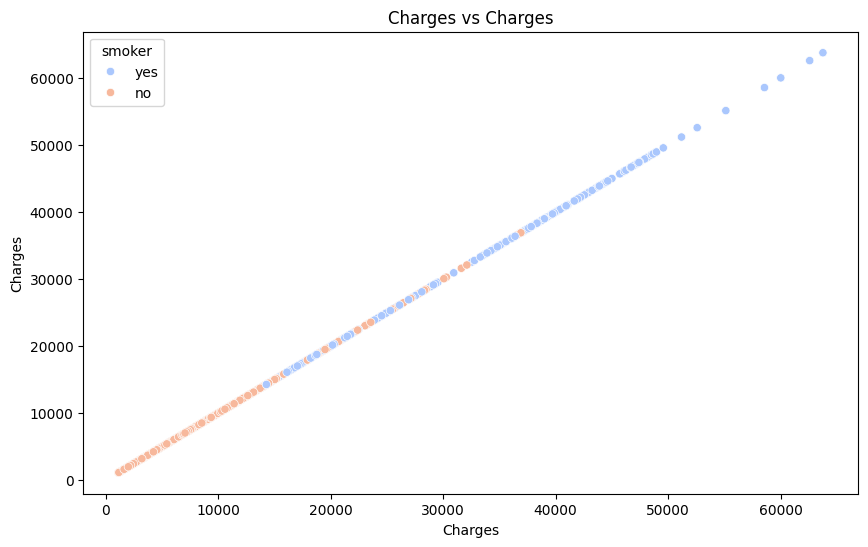

In [ ]:
# 2. M·ªëi quan h·ªá gi·ªØa numerical features -> target
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data['charges'], hue=data['smoker'], palette='coolwarm')
    plt.title(f'Charges vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Charges')
    plt.show()

# - T∆∞∆°ng quan c√°c bi·∫øn

In [ ]:
# One-hot encoding c·ªôt sex, smoker v√† region
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Hi·ªÉn th·ªã DataFrame sau khi one-hot encode
print(data.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


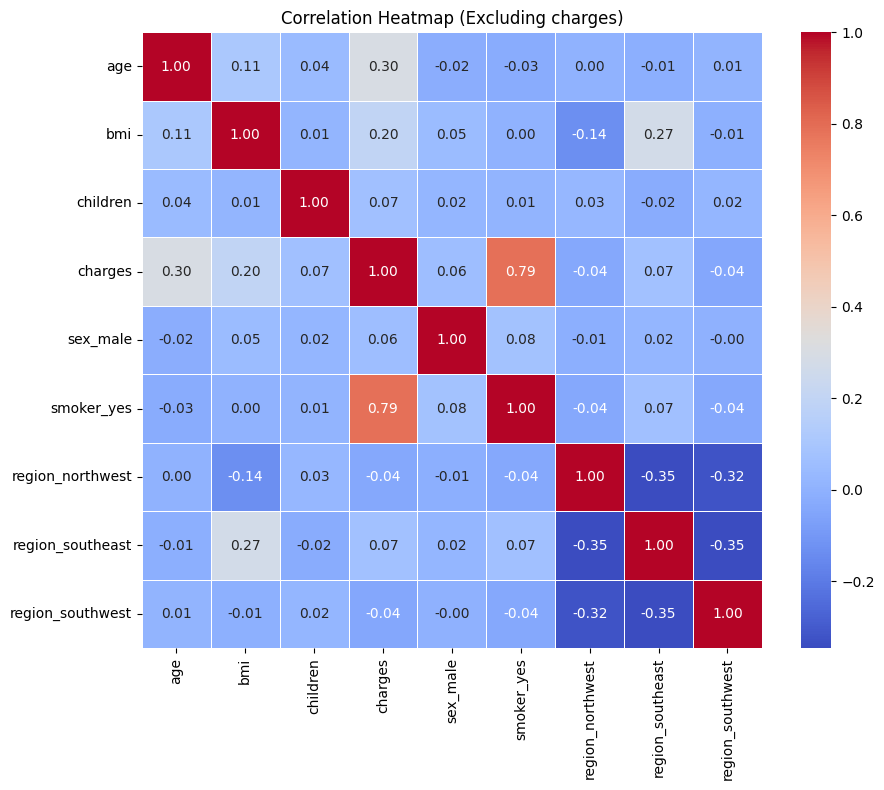


charges             1.000000
smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_male            0.058044
region_northwest   -0.038695
region_southwest   -0.043637
Name: charges, dtype: float64


In [ ]:
# T√≠nh h·ªá s·ªë t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn trong DataFrame v√† target
correlation_matrix = data.corr()

# V·∫Ω heatmap cho h·ªá s·ªë t∆∞∆°ng quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Excluding charges)')
plt.show()

# L·∫•y h·ªá s·ªë t∆∞∆°ng quan v·ªõi target
target_correlation = correlation_matrix['charges']

# S·∫Øp x·∫øp v√† ch·ªçn 2 bi·∫øn c√≥ h·ªá s·ªë t∆∞∆°ng quan cao nh·∫•t v·ªõi target
top_correlations = target_correlation.sort_values(ascending=False)

# In ra c√°c bi·∫øn c√≥ h·ªá s·ªë t∆∞∆°ng quan cao v·ªõi target
print()
print(top_correlations.sort_values(ascending=False))

###  **Nh·∫≠n x√©t v·ªÅ m·ª©c ƒë·ªô quan tr·ªçng c·ªßa c√°c bi·∫øn trong vi·ªác d·ª± ƒëo√°n chi ph√≠ b·∫£o hi·ªÉm (`charges`):**

---

### **Top 3 bi·∫øn c√≥ t∆∞∆°ng quan m·∫°nh nh·∫•t v·ªõi `charges`:**

1. **`smoker_yes` (h√∫t thu·ªëc): 0.787**
   - ƒê√¢y l√† bi·∫øn quan tr·ªçng nh·∫•t, c√≥ t∆∞∆°ng quan **d∆∞∆°ng m·∫°nh** v·ªõi chi ph√≠ b·∫£o hi·ªÉm.
   - Ng∆∞·ªùi h√∫t thu·ªëc c√≥ chi ph√≠ b·∫£o hi·ªÉm cao h∆°n r·∫•t nhi·ªÅu so v·ªõi ng∆∞·ªùi kh√¥ng h√∫t thu·ªëc.
   - Bi·∫øn n√†y ·∫£nh h∆∞·ªüng l·ªõn ƒë·∫øn m√¥ h√¨nh d·ª± ƒëo√°n v√† kh√¥ng n√™n b·ªè qua.

2. **`age` (tu·ªïi): 0.298**
   - Tu·ªïi c√†ng cao, chi ph√≠ b·∫£o hi·ªÉm c√†ng tƒÉng.
   - ƒêi·ªÅu n√†y h·ª£p l√Ω v√¨ ng∆∞·ªùi l·ªõn tu·ªïi c√≥ nguy c∆° m·∫Øc c√°c b·ªánh l√Ω cao h∆°n, d·∫´n ƒë·∫øn chi ph√≠ y t·∫ø cao h∆°n.

3. **`bmi` (ch·ªâ s·ªë kh·ªëi c∆° th·ªÉ): 0.198**
   - Ch·ªâ s·ªë BMI cao c√≥ li√™n quan ƒë·∫øn chi ph√≠ b·∫£o hi·ªÉm cao h∆°n.
   - Ng∆∞·ªùi c√≥ BMI cao d·ªÖ m·∫Øc c√°c b·ªánh li√™n quan ƒë·∫øn b√©o ph√¨ nh∆∞ ti·ªÉu ƒë∆∞·ªùng, tim m·∫°ch, l√†m tƒÉng chi ph√≠ y t·∫ø.

---

### **Bi·∫øn c√≥ ·∫£nh h∆∞·ªüng nh·ªè ho·∫∑c ng∆∞·ª£c chi·ªÅu v·ªõi `charges`:**

4. **`region_southeast`: 0.074**
   - Ng∆∞·ªùi s·ªëng ·ªü khu v·ª±c `southeast` c√≥ xu h∆∞·ªõng ph·∫£i tr·∫£ chi ph√≠ b·∫£o hi·ªÉm cao h∆°n m·ªôt ch√∫t so v·ªõi c√°c khu v·ª±c kh√°c.

5. **`children`: 0.067**
   - S·ªë l∆∞·ª£ng con c√°i c√≥ t√°c ƒë·ªông nh·ªè ƒë·∫øn chi ph√≠ b·∫£o hi·ªÉm.
   - ƒêi·ªÅu n√†y c√≥ th·ªÉ do vi·ªác b·∫£o hi·ªÉm cho tr·∫ª em kh√¥ng ·∫£nh h∆∞·ªüng nhi·ªÅu ƒë·∫øn chi ph√≠ b·∫£o hi·ªÉm t·ªïng th·ªÉ.

6. **`sex_male`: 0.058**
   - Gi·ªõi t√≠nh c√≥ t√°c ƒë·ªông r·∫•t nh·ªè ƒë·∫øn chi ph√≠ b·∫£o hi·ªÉm.

7. **`region_northwest`: -0.039**
8. **`region_southwest`: -0.044**
   - C√°c khu v·ª±c `northwest` v√† `southwest` c√≥ t∆∞∆°ng quan **ng∆∞·ª£c chi·ªÅu nh·∫π** v·ªõi `charges`, cho th·∫•y ng∆∞·ªùi s·ªëng ·ªü c√°c khu v·ª±c n√†y c√≥ th·ªÉ ph·∫£i tr·∫£ √≠t chi ph√≠ b·∫£o hi·ªÉm h∆°n.

---

### üìù **T√≥m t·∫Øt nh·∫≠n x√©t:**

| Bi·∫øn            | T∆∞∆°ng quan v·ªõi `charges` | Nh·∫≠n x√©t                                |
|-----------------|--------------------------|----------------------------------------|
| `smoker_yes`    | 0.787                     | Bi·∫øn quan tr·ªçng nh·∫•t, ·∫£nh h∆∞·ªüng r·∫•t l·ªõn. |
| `age`           | 0.298                     | ·∫¢nh h∆∞·ªüng trung b√¨nh, tu·ªïi c√†ng cao chi ph√≠ c√†ng l·ªõn. |
| `bmi`           | 0.198                     | ·∫¢nh h∆∞·ªüng ƒë√°ng k·ªÉ, BMI cao l√†m tƒÉng chi ph√≠. |
| `region_southeast` | 0.074                  | ·∫¢nh h∆∞·ªüng nh·ªè, nh∆∞ng ƒë√°ng ch√∫ √Ω ·ªü khu v·ª±c n√†y. |
| `children`      | 0.067                     | ·∫¢nh h∆∞·ªüng nh·ªè, s·ªë con kh√¥ng t√°c ƒë·ªông nhi·ªÅu. |
| `sex_male`      | 0.058                     | Gi·ªõi t√≠nh c√≥ ·∫£nh h∆∞·ªüng kh√¥ng ƒë√°ng k·ªÉ. |
| `region_northwest` | -0.039                 | ·∫¢nh h∆∞·ªüng r·∫•t nh·ªè, theo chi·ªÅu ng∆∞·ª£c l·∫°i. |
| `region_southwest` | -0.044                 | ·∫¢nh h∆∞·ªüng r·∫•t nh·ªè, theo chi·ªÅu ng∆∞·ª£c l·∫°i. |

---

### **K·∫øt lu·∫≠n:**
- **Bi·∫øn quan tr·ªçng nh·∫•t:** `smoker_yes`.
- C√°c bi·∫øn **`age`** v√† **`bmi`** c≈©ng c√≥ ·∫£nh h∆∞·ªüng ƒë√°ng k·ªÉ.
- C√°c bi·∫øn li√™n quan ƒë·∫øn khu v·ª±c v√† gi·ªõi t√≠nh c√≥ t√°c ƒë·ªông nh·ªè, c√≥ th·ªÉ c√¢n nh·∫Øc lo·∫°i b·ªè ƒë·ªÉ ƒë∆°n gi·∫£n h√≥a m√¥ h√¨nh.

# 4. Modeling

# - Lo·∫°i outlier


In [ ]:
# L∆∞u DataFrame ban ƒë·∫ßu v√†o bi·∫øn Insurance_data
Insurance_data = data.copy()

In [ ]:
# Gi·∫£ s·ª≠ b·∫°n ƒë√£ c√≥ DataFrame df ch·ª©a c√°c c·ªôt: smoker_yes, age, bmi

# Chuy·ªÉn smoker_yes t·ª´ boolean sang numeric (0, 1)
data['smoker_yes'] = data['smoker_yes'].astype(int)

# Ch·ªçn c√°c c·ªôt c·∫ßn x·ª≠ l√Ω
columns = ['smoker_yes', 'age', 'bmi', 'charges']

# T√≠nh to√°n Q1, Q3, v√† IQR cho t·ª´ng c·ªôt
for col in columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # X√°c ƒë·ªãnh outliers theo IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # L·ªçc d·ªØ li·ªáu ƒë·ªÉ lo·∫°i b·ªè outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

data['smoker_yes'] = data['smoker_yes'].astype(bool)

# Ki·ªÉm tra k·∫øt qu·∫£ sau khi lo·∫°i b·ªè outliers
print(data.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   
5   31  25.740         0   3756.62160     False       False             False   

   region_southeast  region_southwest  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
5              True             False  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 1 to 1336
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1009 non-null   int64  
 1   bmi               1009 non-null   float64
 2   children          1009 non-null   int64  
 3   charges           1009 non-null   float64
 4   sex_male          1009 non-null   bool   
 5   smoker_yes        1009 non-null   bool   
 6   region_northwest  1009 non-null   bool   
 7   region_southeast  1009 non-null   bool   
 8   region_southwest  1009 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 44.3 KB


In [ ]:
print("ch√™nh l·ªách s·ªë d√≤ng d·ªØ li·ªáu ban ƒë·∫ßu l√†: ")
print(len(Insurance_data) - len(data))

ch√™nh l·ªách s·ªë d√≤ng d·ªØ li·ªáu ban ƒë·∫ßu l√†: 
328


#- M√¥ h√¨nh h·ªìi quy Lasso Regression

In [ ]:
# Ch·ªçn c√°c ƒë·∫∑c tr∆∞ng quan tr·ªçng
selected_features = ['smoker_yes', 'age','bmi']
X = data[selected_features]
y = data['charges']

In [ ]:
#Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Chia d·ªØ li·ªáu th√†nh train-test (80:20) v·ªõi random_state=2025
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)


In [ ]:
# Kh·ªüi t·∫°o m√¥ h√¨nh Lasso
m3 = 'Lasso Regression'
lasso = Lasso(alpha=0.01, random_state=2025)

# Hu·∫•n luy·ªán m√¥ h√¨nh
lasso.fit(X_train, y_train)

# D·ª± ƒëo√°n tr√™n t·∫≠p test
y_pred = lasso.predict(X_test)

# T√≠nh to√°n c√°c ch·ªâ s·ªë ƒë√°nh gi√°
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print(f"MSE {m3}: {mse:,.4f}")
print(f"RMSE {m3}: {rmse:,.4f}")
print(f"MAE {m3}: {mae:,.4f}")
print(f"R¬≤ {m3}: {r2:.2f}%")


MSE Lasso Regression: 5,692,227.2674
RMSE Lasso Regression: 2,385.8389
MAE Lasso Regression: 1,251.5229
R¬≤ Lasso Regression: 71.03%


###**Nh·∫≠n x√©t chi ti·∫øt:**

1. **MSE v√† RMSE:**
   - **MSE** l√† **5.692 tri·ªáu** v√† **RMSE** l√† **2,385.84**, cho th·∫•y m√¥ h√¨nh d·ª± ƒëo√°n chi ph√≠ b·∫£o hi·ªÉm v·ªõi sai s·ªë trung b√¨nh kho·∫£ng **2,385 ƒë∆°n v·ªã**.
   - Sai s·ªë n√†y v·∫´n t∆∞∆°ng ƒë·ªëi l·ªõn, nghƒ©a l√† m√¥ h√¨nh c√≥ th·ªÉ ch∆∞a d·ª± ƒëo√°n t·ªët v·ªõi c√°c tr∆∞·ªùng h·ª£p c√≥ chi ph√≠ b·∫£o hi·ªÉm r·∫•t cao (outliers).

2. **MAE (Mean Absolute Error):**
   - **MAE** l√† **1,251.53**, cho th·∫•y sai s·ªë tuy·ªát ƒë·ªëi trung b√¨nh kho·∫£ng **1,251 ƒë∆°n v·ªã**.
   - MAE nh·ªè h∆°n RMSE, ƒëi·ªÅu n√†y cho th·∫•y c√°c l·ªói l·ªõn (outliers) c√≥ t√°c ƒë·ªông ƒë√°ng k·ªÉ ƒë·∫øn MSE v√† RMSE.

3. **R¬≤ (R-squared):**
   - **R¬≤ = 71.03%**, cho th·∫•y m√¥ h√¨nh gi·∫£i th√≠ch ƒë∆∞·ª£c **71.03%** ph∆∞∆°ng sai c·ªßa d·ªØ li·ªáu.
   - ƒê√¢y l√† m·ªôt k·∫øt qu·∫£ **t·ªët**, cho th·∫•y m√¥ h√¨nh c√≥ kh·∫£ nƒÉng d·ª± ƒëo√°n kh√° ·ªïn ƒë·ªãnh.

---

### **ƒê√°nh gi√°:**
- M√¥ h√¨nh **Lasso Regression** ho·∫°t ƒë·ªông t·ªët, v·ªõi **R¬≤ = 71.03%**, cho th·∫•y m√¥ h√¨nh c√≥ th·ªÉ gi·∫£i th√≠ch ph·∫ßn l·ªõn bi·∫øn ƒë·ªông c·ªßa d·ªØ li·ªáu.
- Tuy nhi√™n, do **MSE** v√† **RMSE** v·∫´n c√≤n kh√° cao, c·∫ßn ti·∫øp t·ª•c t·ªëi ∆∞u m√¥ h√¨nh ho·∫∑c x·ª≠ l√Ω c√°c outliers ƒë·ªÉ gi·∫£m sai s·ªë.
- **Lasso Regression** c√≥ th·ªÉ hi·ªáu qu·∫£ h∆°n khi d·ªØ li·ªáu ch·ª©a nhi·ªÅu feature c√≥ t∆∞∆°ng quan cao (multicollinearity), gi√∫p gi·∫£m overfitting so v·ªõi Linear Regression th√¥ng th∆∞·ªùng.

